<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

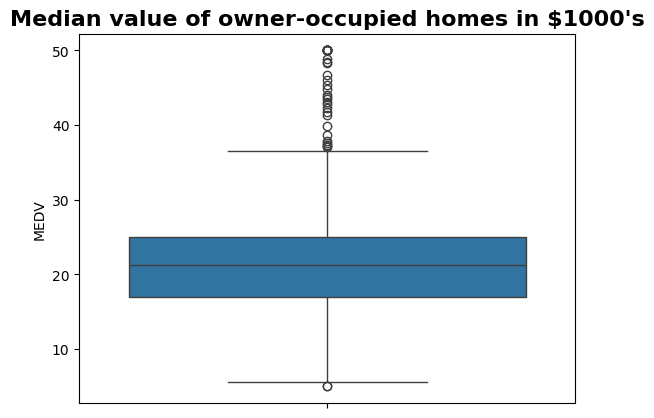

In [16]:
# a) MERV value boxplot

sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Median value of owner-occupied homes in $1000's", fontsize=16, fontweight='bold')


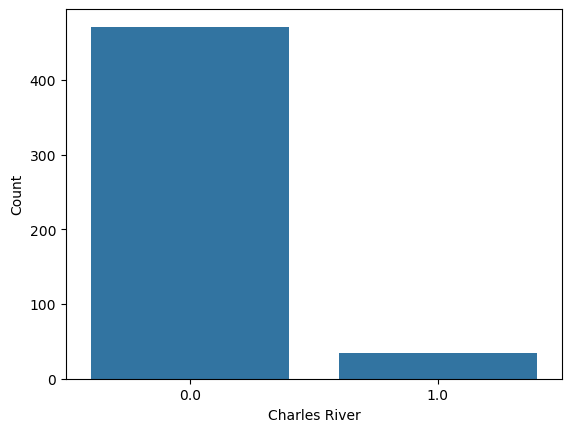

In [25]:
counts = boston_df['CHAS'].value_counts().reset_index()

counts.columns = ['Charles River', 'Count']
barplot = sns.barplot(
    x="Charles River",
    y="Count",
    data=counts,
)

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV                      age group  
0  296.0     15.3   4.98  24.0  between 35 years and 70 years  
1  242.0     17.8   9.14  21.6             70 years and older  
2  242.0     17.8   4.03  34.7  between 35 years and 70 years  
3  222.0     18.7   2.94  33.4  between 35 years and 70 years  
4  222.0     18.7   5.33  36.2  between 35 years and 70 years  


Text(0, 0.5, 'MEDV')

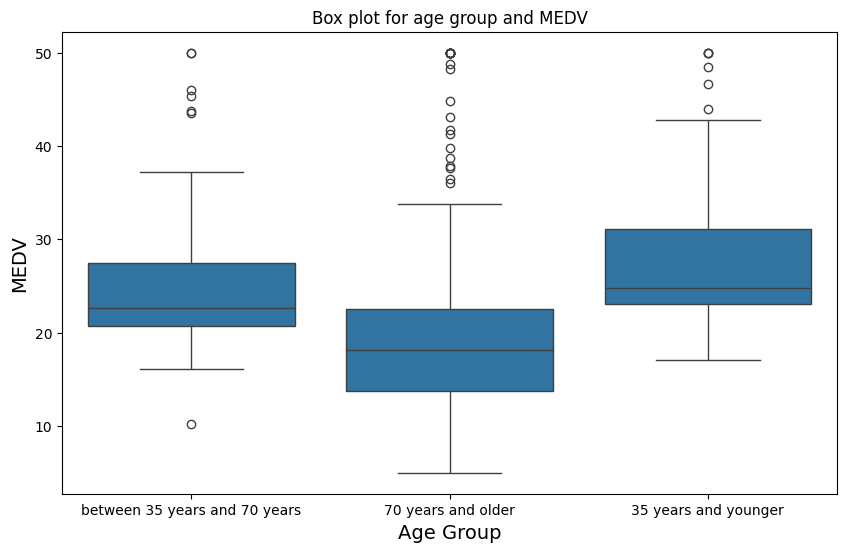

In [21]:
boston_df.loc[(boston_df['AGE'] <= 35),'age group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >  35) &(boston_df['AGE'] < 70),'age group'] = 'between 35 years and 70 years'
boston_df.loc[(boston_df['AGE'] >=70),'age group'] = '70 years and older'

print(boston_df.head())
#making the box plot
pyplot.figure(figsize=(10,6))
plot = sns.boxplot(x='age group', y='MEDV', data=boston_df)
pyplot.title("Box plot for age group and MEDV")
pyplot.xlabel("Age Group", fontsize=14)
pyplot.ylabel("MEDV", fontsize=14)

Text(0.5, 0, 'INDUS')

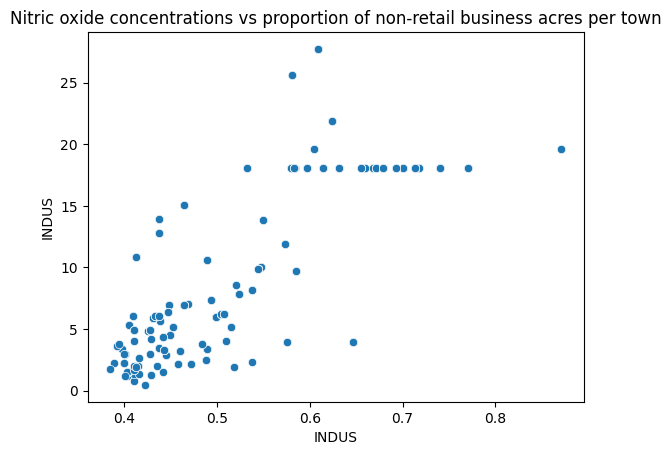

In [50]:
#scatter plot
sns.scatterplot(x='NOX',y='INDUS', data=boston_df)
pyplot.title("Nitric oxide concentrations vs proportion of non-retail business acres per town")
pyplot.xlabel('NOX')
pyplot.xlabel('INDUS')

Text(0.5, 1.0, 'Histogram for Pupil to Teacher Ratio')

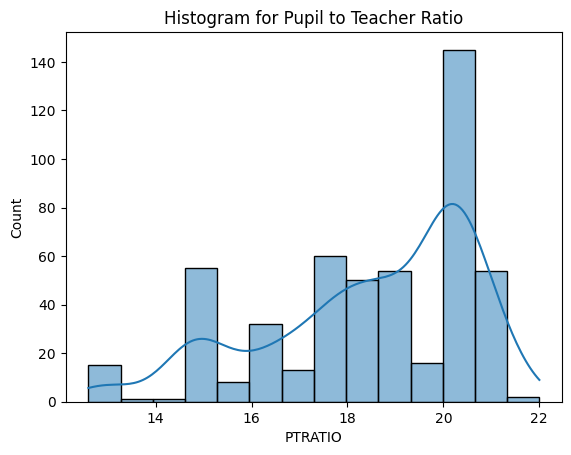

In [52]:
#boxplot
sns.histplot(x='PTRATIO',data=boston_df,kde=True)
pyplot.title("Histogram for Pupil to Teacher Ratio")

TASK 3

In [ ]:
'''1. Null Hypothesis: There is no significant difference in the median value of houses (MEDV) between houses located by the Charles River and those not located by the Charles River.
   2. Alternative Hypothesis: There is a significant difference in the median value of houses (MEDV) between houses located by the Charles River and those not located by the Charles River.'''
river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(river_bounded, not_river_bounded, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is a significant difference in the median value of houses bounded by the Charles River.


In [32]:
""" 1. Null Hypothesis: There is no difference in the mean median values of houses (MEDV) across the different AGE groups.
    2. Alternate Hypothesis: There is a difference in the mean median values of houses (MEDV) among at least one of the AGE groups.
"""

scipy.stats.levene(boston_df[boston_df['age group'] == '35 years and younger']['MEDV'],
                  boston_df[boston_df['age group'] == 'between 35 years and 70 years']['MEDV'], 
                   boston_df[boston_df['age group'] == '70 years and older']['MEDV'], 
                   center='mean')

# p value is 0.062 greater than alpha,so variance are equal, proceeding with ANOVA
first = boston_df[boston_df['age group'] == '35 years and younger']['MEDV']
second =boston_df[boston_df['age group'] == 'between 35 years and 70 years']['MEDV']
third = boston_df[boston_df['age group'] == '70 years and older']['MEDV']

# one way anova
f_statistic, p_value = scipy.stats.f_oneway(first, second, third)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the median values of houses across the AGE groups.")
else:
    print("There is no significant difference in the median values of houses across the AGE groups.")
#interpretation: P value for one way ANOVA is 1.71x10^-5, less than 0.05 so we can reject NULL hypothesis,This suggests statistically significant difference in MEDV across the AGE .


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
There is a significant difference in the median values of houses across the AGE groups.


In [34]:
"""1. Null Hypothesis: There is no linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
    2. Alternative Hypothesis: There is a linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS)."""

corr_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant linear relationship between NOX and INDUS.")
else:
    print("There is no significant linear relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
There is a significant linear relationship between NOX and INDUS.


In [37]:
'''1. Null Hypothesis: There is no effect of the additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes (MEDV).
    2. Alternate Hypothesis: here is an effect of the additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes (MEDV).'''
X = boston_df['DIS']  
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

alpha = 0.05 

print("\nInterpretation of the Results:")
print(f"Coefficient for DIS: {coefficient}")
print(f"P-value for DIS: {p_value}")
print(f"R-squared: {r_squared}")

# Hypothesis testing interpretation
if p_value < alpha:
    print("\nSince the p-value is less than 0.05, we reject the null hypothesis.")
    print("This suggests that the additional weighted distance to the five employment centers has a significant effect on the median value of owner-occupied homes.")
else:
    print("\nSince the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the additional weighted distance to the five employment centers does not have a significant effect on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        08:48:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<class 'NameError'>: name 'coefficient' is not defined